In [2]:
# task 1.1

import numpy as np
import time 
import tracemalloc #measure memory of each task
import matplotlib.pyplot as plt

ri_10 = np.random.randint(0,99, size=(10)) # ri = random integer
ri_100 = np.random.randint(0,99, size=(100))
ri_1000 = np.random.randint(0,99, size=(1000))
ri_10000 = np.random.randint(0,99, size=(10000))

rf_10 = np.random.uniform(0, 99.9, size=(10)) # rf = random float
rf_100 = np.random.uniform(0, 99.9, size=(10))
rf_1000 = np.random.uniform(0, 99.9, size=(10))
rf_10000 = np.random.uniform(0, 99.9, size=(10))

arrays = [
    ("10 int",        ri_10),
    ("100 int",      ri_100),
    ("1000 int",    ri_1000),
    ("10000 int",  ri_10000),
    ("10 float",      rf_10),
    ("100 float",    rf_100),
    ("1000 float",  rf_1000),
    ("10000 float", rf_10000)
]

tracemalloc.start()
start_time = time.time()

def reverse_array(arr):
     return arr[::-1] # start:stop:step

end_time = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(ri_10)
reverse_array(ri_10)

# print(f"Current memory usage: {current / (1024 * 1024)} MB")
# print(f"Peak memory usage: {peak / (1024 * 1024)} MB")
# print("Time taken: ", end_time - start_time, "seconds")


[37 88 77 73 48 39 35 17  7 42]


array([42,  7, 17, 35, 39, 48, 73, 77, 88, 37])

In [3]:
# task 2.1

def bubble_sort(l):
    indexing_lenght = len(l) - 1
    sorted = False

    while not sorted:
        sorted = True
        for i in range(0, indexing_lenght):
            if l[i] > l[i+1]:
                sorted = False
                l[i], l[i+1] = l[i+1], l[i]
    return l
print(ri_10)
bubble_sort(ri_10)

[37 88 77 73 48 39 35 17  7 42]


array([ 7, 17, 35, 37, 39, 42, 48, 73, 77, 88])

In [4]:
# task 3.1

def insertion_sort(l):
    indexing_lenght = range(1, len(l))
    for i in indexing_lenght:
        value_to_sort = l[i]

        while l[i-1] > value_to_sort and i>0:
            l[i], l[i-1] = l[i-1], l[i]
            i = i - 1
    
    return l

print(ri_10)
insertion_sort(ri_10)

[ 7 17 35 37 39 42 48 73 77 88]


array([ 7, 17, 35, 37, 39, 42, 48, 73, 77, 88])

In [5]:
# task 4.1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    low = []
    high = []
    equal = []

    for num in arr:
        if num < pivot:
            low.append(num)
        elif num > pivot:
            high.append(num)
        else:
            equal.append(num)

    return quick_sort(low) + equal + quick_sort(high)

print(ri_10)
insertion_sort(ri_10)


[ 7 17 35 37 39 42 48 73 77 88]


array([ 7, 17, 35, 37, 39, 42, 48, 73, 77, 88])

In [5]:
def binary_search(sequence, item):
    begin_index = 0
    end_index = len(sequence) - 1

    while begin_index <= end_index:
        midpoint = begin_index + (end_index - begin_index) // 2
        midpoint_value = sequence[midpoint]
        if midpoint_value == item:
            return midpoint
        
        elif item < midpoint_value:
            end_index = midpoint - 1

        else:
             begin_index = midpoint + 1

    return None

print(ri_10)
insertion_sort(ri_10)

In [6]:
def measure_algorithm(algorithm, array, *args):
    start_time = time.time()
    tracemalloc.start()
    if algorithm == binary_search:
        result = algorithm(array, *args)
    else:
        result = algorithm(array)
    end_time = time.time()
    time_of_execution = end_time - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop() 
    return time_of_execution, peak 

reverse_array with 10 int: Time taken - 0.0 seconds, Memory used - 168 
reverse_array with 100 int: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 1000 int: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 10000 int: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 10 float: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 100 float: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 1000 float: Time taken - 0.0 seconds, Memory used - 96 
reverse_array with 10000 float: Time taken - 0.0 seconds, Memory used - 96 
bubble_sort with 10 int: Time taken - 0.0 seconds, Memory used - 152 
bubble_sort with 100 int: Time taken - 0.01100015640258789 seconds, Memory used - 80 
bubble_sort with 1000 int: Time taken - 2.145599603652954 seconds, Memory used - 4888 
bubble_sort with 10000 int: Time taken - 235.34941053390503 seconds, Memory used - 3484 
bubble_sort with 10 float: Time taken - 0.0 seconds, Memory used - 80 
bubble_s

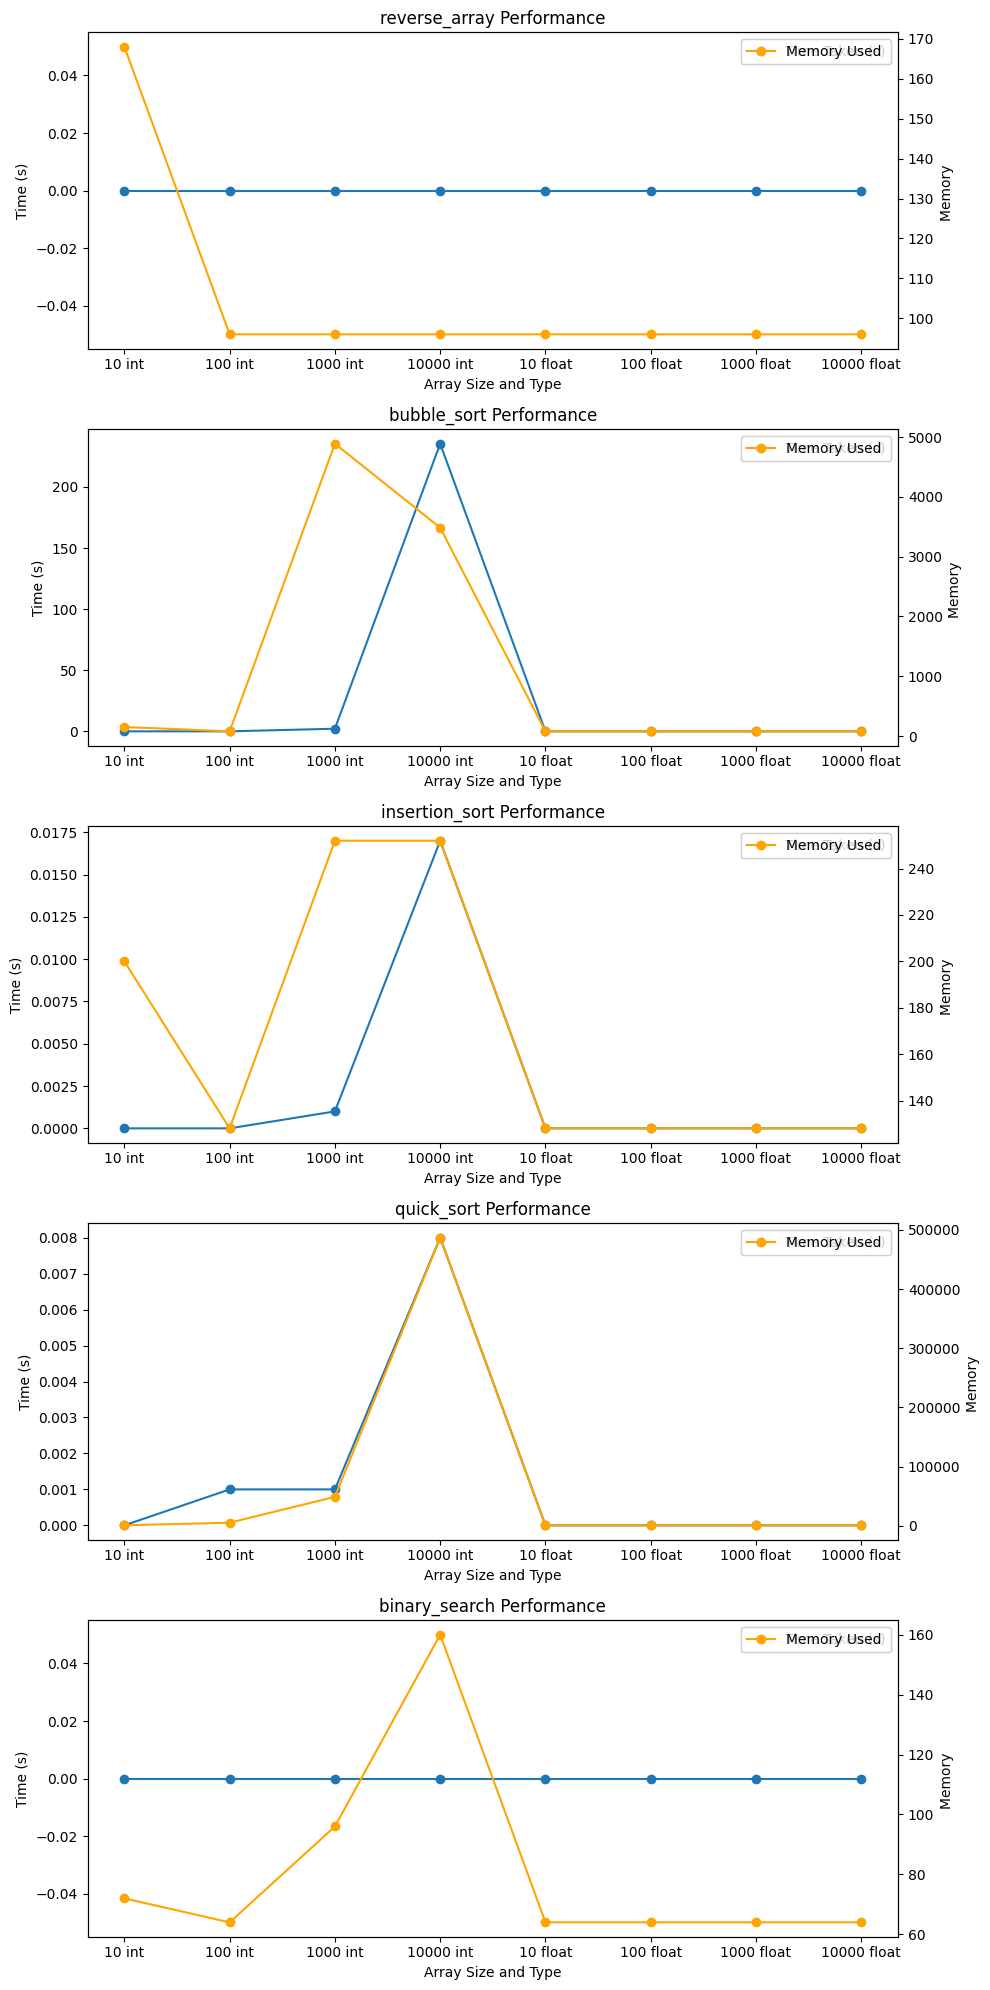

In [7]:
algorithms = [reverse_array, bubble_sort, insertion_sort, quick_sort, binary_search]

fig, axs = plt.subplots(5, figsize=(10, 20))

for j, algorithm in enumerate(algorithms):
    time_taken_list = []
    memory_used_list = []
    for array_name, array in arrays:
        if algorithm == binary_search:
            time_taken, memory_used = measure_algorithm(algorithm, quick_sort(array), 14)
        else:
            time_taken, memory_used = measure_algorithm(algorithm, array)
        print(f"{algorithm.__name__} with {array_name}: Time taken - {time_taken} seconds, Memory used - {memory_used} ")
        time_taken_list.append(time_taken)
        memory_used_list.append(memory_used)


    axs[j].plot([name for name, _ in arrays], time_taken_list, label='Time Taken (s)', marker='o')
    axs[j].set_xlabel('Array Size and Type')
    axs[j].set_ylabel('Time (s)')
    axs[j].set_title(f'{algorithm.__name__} Performance')
    axs[j].legend()


    axs_mem = axs[j].twinx()
    axs_mem.plot([name for name, _ in arrays], memory_used_list, color='orange', label='Memory Used ', marker='o')
    axs_mem.set_ylabel('Memory ')
    axs_mem.legend()

plt.tight_layout()
plt.show()